# Setup

In [1]:
%load_ext autoreload
%autoreload 2  
%matplotlib inline

In [3]:
import numpy as np
from pathlib import Path
from davidson.experiment import Experiment, Laboratory
import pandas as pd
import sqlite3
from davidson import pycore, cppcore
core = cppcore
from davidson.network import Network

In [3]:
ps = core.ProductSpec(cue=3, reg=6, out=2)

In [4]:
t1 = np.array([
    [-1, 1, 1, 1, 2],
    [-1, -1, -1, -1, -2]
])
ch1 = core.SingleChallenge(inputs=core.ExternalInput([("AB", 1), ("B", 1)]), target=t1)
t2 = np.array([
    [-1, -1, -1, -1, -2],
    [-1, 1, -1, -1, 2]
])
ch2 = core.SingleChallenge(inputs=core.ExternalInput([("CB", 1), ("CA", 1)]), target=t2)

In [5]:
t1 = np.array([
    [1,-1, 2,-2],
    [-1,-1,-2, -2]
])
ch1 = core.SingleChallenge(inputs=core.ExternalInput([("A", 1), ("B", 1)]), target=t1)
t2 = np.array([
    [-1, -2],
    [-1, 2]
])
ch2 = core.SingleChallenge(inputs=core.ExternalInput([("B", 1), ("A", 1)]), target=t2)

In [6]:
ae_2d = core.SingleAE(pspec=ps, challenges=[ch1, ch2])
fs=core.FactorySpec(crm_count=4)
fct = core.Factory(seed=1, ae=ae_2d, fspec=fs)

In [7]:
pop = core.Population.create_heterogenous(fct, 1000)

In [9]:
for i in range(10000):
    pop = core.next_generation(pop)
print(pop.fitnesses.max())

1.0


In [116]:
ix = np.where(pop.fitnesses == pop.fitnesses.max())[0]
gt = pop.genotypes[ix[0]]

In [117]:
ps

ProductSpec(AB|CDEFGH|IJ)

In [118]:
ae_2d.calc_responses(gt.genes, None)

[Response([{A}]/[{BCEGHI}, {CEFG}]/[{CEFGHI}, {CDEFG}]),
 Response([{B}]/[{ACDEGH}]/[{CDEFGHJ}])]

In [119]:
from davidson.network import Network

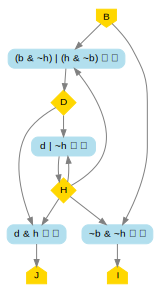

In [120]:
Network.from_genotype(gt)

In [167]:
from davidson.utility import generate_functions
funcs = list(generate_functions())

t1 = np.array([
    [2, -2],
    [2, -2],
    [-2, -2],
    [-2, -2]
])
t2 = np.array([
    [-2, -2],
    [-2, -2],
    [2, -2],
    [2, -2],
])

s1 = np.array([.5,.5, 0, 0])
s2 = np.array([1,1, 1/3, 1/3])

pt1 = [t1, t2]
pt2 = [s1, s2]
def make_delayed_challenges(mapping, patterns, core):
    challenges = []
    for ins, outs in mapping.items():
        trs = []
        for i, k in enumerate(ins):
            if k:
                prod = "ABC"[i]
            else:
                prod = ""

            trs.append((prod, 1))
            trs.append(("", 4))

        trs[-1] = ("", -1)
        challenges.append(core.SingleChallenge(core.ExternalInput(trs), patterns[outs]))

    return challenges


def make_ae(core):
    # logger.info(f"Using function `{func[5][0]}`")
    mapping = funcs[5][1]
    # trs = make_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
#     chs = make_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
#     chs = make_delayed_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
    chs = make_delayed_challenges(mapping, pt1, core)

    ps = core.ProductSpec(cue=3, reg=6, out=4)
    ae = core.SingleAE(pspec=ps, challenges=chs)
    return ae

ae = make_ae(core)

In [170]:
fs = core.FactorySpec(crm_count=4)
fct = core.Factory(seed=2, ae=ae, fspec=fs)
pop = core.Population.create_heterogenous(fct, 1000)

In [171]:
for i in range(10000):
    pop = core.next_generation(pop)
    if i % 500 == 0:
        print(pop.fitnesses.max())
print(pop.fitnesses.max())

9.151744253658552e-16
1.241120046671949e-10
6.259504246556122e-06
0.007454186295369829
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
0.01831563888873418
1.0
1.0
1.0
1.0
1.0


In [172]:
ix = np.where(pop.fitnesses == pop.fitnesses.max())[0]
gt = pop.genotypes[ix[0]]

In [173]:
ae.calc_responses(gt.genes, None)

[Response([{}, {DEFGJK}, {E}, {DEFGJK}, {E}, {DEFGJK}, {E}, {DEFGJK}, {E}, {DEFGJK}, {E}]/[]/[{DEFGJK}, {E}]),
 Response([{}, {DEFGJK}, {E}, {DEFGJK}, {E}, {DEFGJK}, {E}, {DEFGJK}, {E}, {DEFGJK}, {CE}]/[]/[{DEFGJK}, {E}]),
 Response([{}, {DEFGJK}, {E}, {DEFGJK}, {E}, {BDEFGJK}, {DEI}, {EFGIJKLM}, {DEGI}, {EFGILM}, {DEGI}]/[]/[{EFGILM}, {DEGI}]),
 Response([{}, {DEFGJK}, {E}, {DEFGJK}, {E}, {BDEFGJK}, {DEI}, {EFGIJKLM}, {DEGI}, {EFGILM}, {CDEGI}]/[]/[{EFGJK}, {DE}]),
 Response([{A}, {DEFGIJK}, {EGI}, {DEFGILM}, {EGI}, {DEFGILM}, {EGI}, {DEFGILM}, {EGI}, {DEFGILM}, {EGI}]/[]/[{DEFGILM}, {EGI}]),
 Response([{A}, {DEFGIJK}, {EGI}, {DEFGILM}, {EGI}, {DEFGILM}, {EGI}, {DEFGILM}, {EGI}, {DEFGILM}, {CEGI}]/[]/[{DEFGILM}, {EGI}]),
 Response([{A}, {DEFGIJK}, {EGI}, {DEFGILM}, {EGI}, {BDEFGILM}, {DEGI}, {EFGILM}, {DEGI}, {EFGILM}, {DEGI}]/[]/[{EFGILM}, {DEGI}]),
 Response([{A}, {DEFGIJK}, {EGI}, {DEFGILM}, {EGI}, {BDEFGILM}, {DEGI}, {EFGILM}, {DEGI}, {EFGILM}, {CDEGI}]/[]/[{EFGJK}, {DE}])]

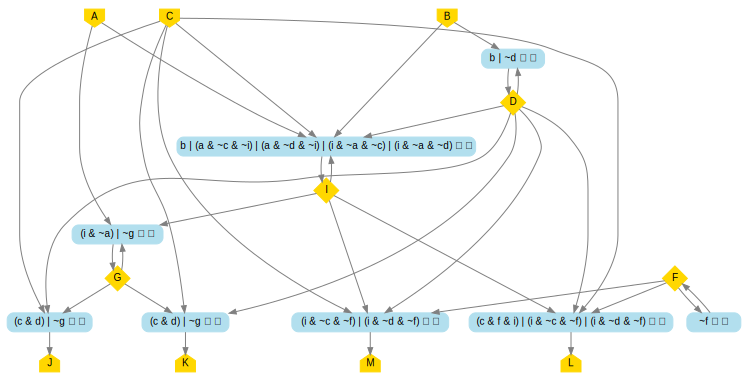

In [174]:
Network.from_genotype(gt)

In [176]:
ae.calc_phenotype(gt.genes)

array([[0.5, 0.5, 0. , 0. ],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5],
       [0.5, 0.5, 0. , 0. ]])

## New ideas

Try and move something from one attractor to another

In [10]:
from davidson.utility import generate_functions
funcs = list(generate_functions())

s1 = np.array([1, 1, 0, 0])
s2 = np.array([0, 0, 1, 1])

pt1 = [t1, t2]
pt2 = [s1, s2]
def make_delayed_challenges(mapping, patterns, core):
    challenges = []
    for ins, outs in mapping.items():
        trs = []
        for i, k in enumerate(ins):
            if k:
                prod = "ABC"[i]
            else:
                prod = ""

            trs.append((prod, 1))
            trs.append(("", 4))

        trs[-1] = ("", -1)
        challenges.append(core.SingleChallenge(core.ExternalInput(trs), patterns[outs]))

    return challenges


def make_ae(core):
    # logger.info(f"Using function `{func[5][0]}`")
    mapping = funcs[5][1]
    # trs = make_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
#     chs = make_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
#     chs = make_delayed_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
    chs = make_delayed_challenges(mapping, pt2, core)

    ps = core.ProductSpec(cue=3, reg=6, out=4)
    ae = core.SingleAE(pspec=ps, challenges=chs)
    return ae

ae = make_ae(core)

In [11]:
cis_ops = [
    core.BOP.AND,
    core.BOP.OR,
    core.BOP.A_NOTB,
    core.BOP.B_NOTA,
    core.BOP.NAND,
    core.BOP.NOR,
]

fs = core.FactorySpec(
    m_rate=0.001,
    p_gain=0.5,
    p_loss=0.8,
    crm_count=5,
    cis_ops=cis_ops,
    m_scheme=core.MutationScheme.MUTATE_SITES,
)

fc = cppcore.Factory(seed=114, fspec=fs, ae=ae)
pop = core.Population.create_heterogenous(fc, 5000)

In [12]:
for i in range(10000):
    pop = core.next_generation(pop)
    if i % 200 == 0:
        print(pop.fitnesses.max())
print(pop.fitnesses.max())

0.04232921962320499
0.061490858646401164
0.059105746561956225
0.06400864774434425
0.11987325010376206
0.1353352832366127
0.14656497449044736
0.16484071454660576
0.16484071454660576
0.16484071454660576
0.16484071454660576
0.16484071454660576
0.16484071454660576
0.16484071454660576
0.16484071454660576
0.19046013047248447
1.0
1.0
1.0


KeyboardInterrupt: 

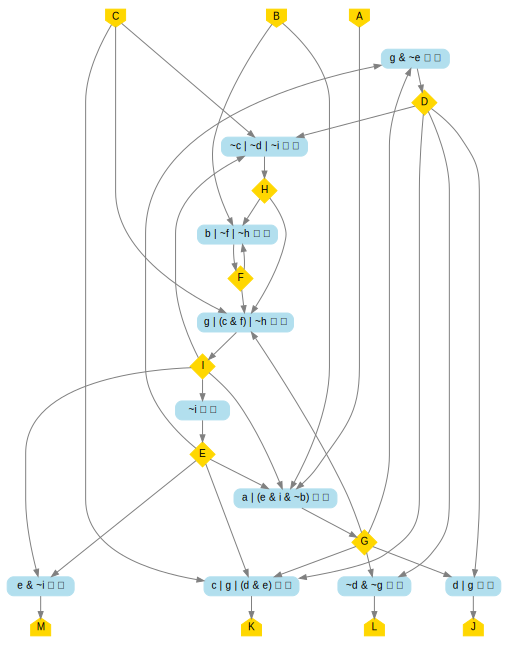

In [13]:
ix = np.where(pop.fitnesses == pop.fitnesses.max())[0]
gt = pop.genotypes[ix[0]]

Network.from_genotype(gt)

In [14]:
for ch in ae.challenges:
    print(ch.inputs.cues[:-1])

[({}, 1), ({}, 4), ({}, 1), ({}, 4), ({}, 1)]
[({}, 1), ({}, 4), ({}, 1), ({}, 4), ({C}, 1)]
[({}, 1), ({}, 4), ({B}, 1), ({}, 4), ({}, 1)]
[({}, 1), ({}, 4), ({B}, 1), ({}, 4), ({C}, 1)]
[({A}, 1), ({}, 4), ({}, 1), ({}, 4), ({}, 1)]
[({A}, 1), ({}, 4), ({}, 1), ({}, 4), ({C}, 1)]
[({A}, 1), ({}, 4), ({B}, 1), ({}, 4), ({}, 1)]
[({A}, 1), ({}, 4), ({B}, 1), ({}, 4), ({C}, 1)]


In [215]:
# Ordering


In [4]:
s1 = np.array([1, 1, 0, 0])
s2 = np.array([0, 0, 1, 1])
rest3 = ("", 3)
rest2 = ("", 2)
chs = []
for r in rest2, rest3:
    e1 = core.ExternalInput([r, ("A", 1), r, ("B", 1), r])
    e2 = core.ExternalInput([r, ("B", 1), r, ("A", 1), r])
    ch1 = core.SingleChallenge(e1, s1)
    ch2 = core.SingleChallenge(e2, s2)
    chs.extend([ch1, ch2])
ps = core.ProductSpec(cue=3, reg=6, out=4)
ae = core.SingleAE(pspec=ps, challenges=chs)

In [5]:
cis_ops = [
    core.BOP.AND,
    core.BOP.OR,
    core.BOP.A_NOTB,
    core.BOP.B_NOTA,
    core.BOP.NAND,
    core.BOP.NOR,
]

fs = core.FactorySpec(
    m_rate=0.001,
    p_gain=0.5,
    p_loss=0.8,
    crm_count=5,
    cis_ops=cis_ops,
    m_scheme=core.MutationScheme.MUTATE_SITES,
)

fc = cppcore.Factory(seed=1, fspec=fs, ae=ae)
pop = core.Population.create_heterogenous(fc, 5000)

In [6]:
for i in range(10000):
    pop = core.next_generation(pop)
    if i % 200 == 0:
        print(pop.fitnesses.max())
print(pop.fitnesses.max())

0.018315638888734182
0.018315638888734182
1.0
1.0
1.0
1.0
1.0
1.0


KeyboardInterrupt: 

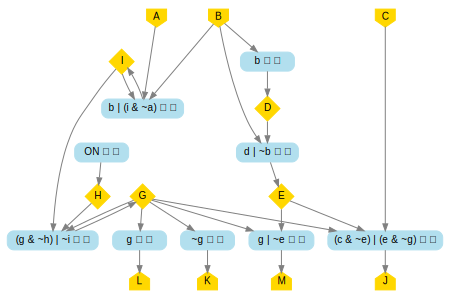

In [8]:
ix = np.where(pop.fitnesses == pop.fitnesses.max())[0]
gt = pop.genotypes[ix[0]]

Network.from_genotype(gt)

In [245]:
ae.calc_responses(gt.genes, None)

[Response([{}, {DEFIJK}, {ADEFILM}, {DEFIL}, {DEFILM}, {BDEFILM}, {DEIL}]/[]/[{DEIJK}]),
 Response([{}, {DEFIJK}, {BDEFILM}, {DEIL}, {DEIJK}, {ADEIJK}, {DEFIJK}]/[]/[{DEFILM}]),
 Response([{}, {DEFIJK}, {DEFILM}, {ADEFILM}, {DEFIL}, {DEFILM}, {DEFILM}, {BDEFILM}, {DEIL}, {DEIJK}]/[]/[{DEIJK}]),
 Response([{}, {DEFIJK}, {DEFILM}, {BDEFILM}, {DEIL}, {DEIJK}, {DEIJK}, {ADEIJK}, {DEFIJK}, {DEFILM}]/[]/[{DEFILM}])]

In [9]:
ae.calc_phenotype(gt.genes)

array([[1., 1., 0., 0.],
       [0., 0., 1., 1.],
       [1., 1., 0., 0.],
       [0., 0., 1., 1.]])

In [231]:
ae.pspec

ProductSpec(ABC|DEFGHI|JKLM)

# Delay trigger

In [4]:
from davidson.utility import generate_functions
funcs = list(generate_functions())

s1 = np.array([1, 1, 0, 0])
s2 = np.array([0, 0, 1, 1])
s3 = np.array([0, 0, 0, 0])
pt1 = [s3, s3]
pt2 = [s1, s2]

def make_delayed_challenges(mapping, patterns, core):
    challenges = []
    for ins, outs in mapping.items():
        trs = []
        for i, k in enumerate(ins):
            if k:
                prod = "ABC"[i]
            else:
                prod = ""

            trs.append((prod, 1))
            trs.append(("", 4))

        challenges.append(core.SingleChallenge(core.ExternalInput(trs), pt1[outs]))
        trs.append(("D", 1))
        challenges.append(core.SingleChallenge(core.ExternalInput(trs), pt2[outs]))
        trs.append(("", 4))
        trs.append(("ABC", 1))
        challenges.append(core.SingleChallenge(core.ExternalInput(trs), pt2[outs]))
        

    return challenges


def make_ae(core):
    # logger.info(f"Using function `{func[5][0]}`")
    mapping = funcs[5][1]
    # trs = make_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
#     chs = make_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
#     chs = make_delayed_challenges(mapping, [[0, 0, 1, 1], [1, 1, 0, 0]], core)
    chs = make_delayed_challenges(mapping, pt2, core)

    ps = core.ProductSpec(cue=4, reg=6, out=4)
    ae = core.SingleAE(pspec=ps, challenges=chs)
    return ae

ae = make_ae(core)

In [10]:
cis_ops = [
    core.BOP.AND,
    core.BOP.OR,
    core.BOP.A_NOTB,
    core.BOP.B_NOTA,
    core.BOP.NAND,
    core.BOP.NOR,
]

fs = core.FactorySpec(
    m_rate=0.001,
    p_gain=0.5,
    p_loss=0.8,
    crm_count=5,
    cis_ops=cis_ops,
    m_scheme=core.MutationScheme.MUTATE_SITES,
)

fc = cppcore.Factory(seed=3, fspec=fs, ae=ae)
pop = core.Population.create_heterogenous(fc, 5000)

In [11]:
for i in range(10000):
    pop = core.next_generation(pop)
    if i % 200 == 0:
        print(pop.fitnesses.max())
print(pop.fitnesses.max())

6.781399250731451e-10
1.471150640716686e-07
3.0590232050182594e-07
1.1140556748528997e-05
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
0.0003354626279025119
1.0
1.0
1.0
1.0
1.0
1.0


KeyboardInterrupt: 

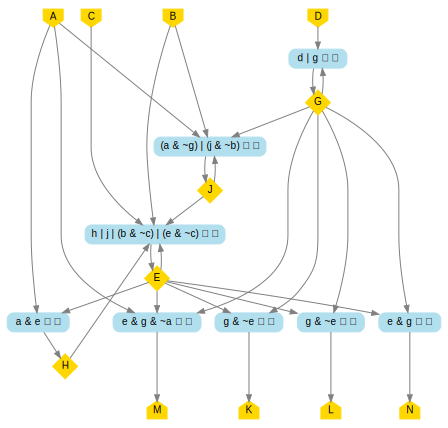

In [12]:
ix = np.where(pop.fitnesses == pop.fitnesses.max())[0]
gt = pop.genotypes[ix[0]]

Network.from_genotype(gt)

In [34]:
d = np.linalg.norm(ae.calc_phenotype(gt.genes) - ae.full_target)
np.exp(-d)

0.02219503745995768

In [139]:
ae.calc_responses(gt.genes, None)

[Response([{}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}]/[]/[{F}]),
 Response([{}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}]/[{DF}, {FG}]/[{FGKL}]),
 Response([{}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {DF}, {FG}, {FGKL}, {FGKL}, {FGKL}]/[{ABCFGKL}]/[{FGKL}]),
 Response([{}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {CF}, {F}, {F}, {F}]/[]/[{F}]),
 Response([{}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {CF}, {F}, {F}, {F}, {F}]/[{DF}, {FG}]/[{FGKL}]),
 Response([{}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {F}, {CF}, {F}, {F}, {F}, {F}, {DF}, {FG}, {FGKL}, {FGKL}, {FGKL}]/[{ABCFGKL}]/[{FGKL}]),
 Response([{}, {F}, {F}, {F}, {F}, {BF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}]/[]/[{EF}]),
 Response([{}, {F}, {F}, {F}, {F}, {BF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}]/[{DEF}, {EFG}]/[{EFGMN}]),
 Response([{}, {F}, {F}, {F}, {F}, {BF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF}, {EF

In [140]:
ae.calc_phenotype(gt.genes)

array([[0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [141]:
ae.calc_phenotype(gt.genes, iv=core.Intervention(knockup=core.Activity("H")))

array([[0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

In [41]:
ae.calc_phenotype(gt.genes, iv=core.Intervention(knockdown=core.Activity("H")))

array([[0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

In [49]:
# Thinking

In [102]:
def dist(a, b):
    tot = 0.
    for x, y in zip(a, b):
        df = x - y
        tot += df * df
    return pow(tot, .5)
        
    df = a - b
    return df * df



def cost(d):
    return np.exp(-np.fabs(d)/.5)

def fit1(a, b):
    return cost(dist(a, b))

def fit2(a, b):
    tot = 0.0
    for x, y in zip(a, b):
        tot += cost(x-y)
    return tot / len(a)

def fit3(a, b):
    tot = 1.0
    for x, y in zip(a, b):
        tot *= cost(x-y)
    return tot
        

In [103]:
a = [1, 2, 3]
b = [2, 3, 4]
fit1(a, b), fit2(a, b), fit3(a, b)

(0.03130111324493289, 0.1353352832366127, 0.002478752176666359)

In [104]:
a = [1, 2, 3]
b = [1, 2, 3]
fit1(a, b), fit2(a, b), fit3(a, b)

(1.0, 1.0, 1.0)

In [105]:
a = [1, 2, 3]
b = [3, 4, 5]
fit1(a, b), fit2(a, b), fit3(a, b)

(0.0009797596903721136, 0.01831563888873418, 6.144212353328208e-06)

In [106]:
a = [1, 2, 3]
b = [1, 2, 5]
fit1(a, b), fit2(a, b), fit3(a, b)

(0.01831563888873418, 0.6727718796295781, 0.01831563888873418)

In [107]:
a = [1, 2, 3]
b = [1, 2, 3.5]
fit1(a, b), fit2(a, b), fit3(a, b)

(0.36787944117144233, 0.7892931470571475, 0.36787944117144233)

In [108]:
a = [1, 2, 3, 4, 5]
b = [1, 2, 3, 4, 6]
fit1(a, b), fit2(a, b), fit3(a, b)

(0.1353352832366127, 0.8270670566473225, 0.1353352832366127)

In [120]:
a = [0, 0, 0, 0, 0]
b = [0, 0, 0, 0, .5]
fit1(a, b), fit2(a, b), fit3(a, b)

(0.36787944117144233, 0.8735758882342886, 0.36787944117144233)